In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tarfile
import os

warnings.simplefilter(action='ignore', category=FutureWarning)



In [2]:
carpeta = './datos/'

datos = pd.read_csv(carpeta + 'datos_segundos.csv.gz', index_col=0, compression='gzip')

datos = datos.dropna()

In [3]:
datos.head()

,dia_habil,hora_laboral,N_jobs_esp,N_jobs_fin
segundostamp,,,,
600,1,1,2,16
601,1,1,0,8
602,1,1,0,11
603,1,1,1,11
604,1,1,5,10


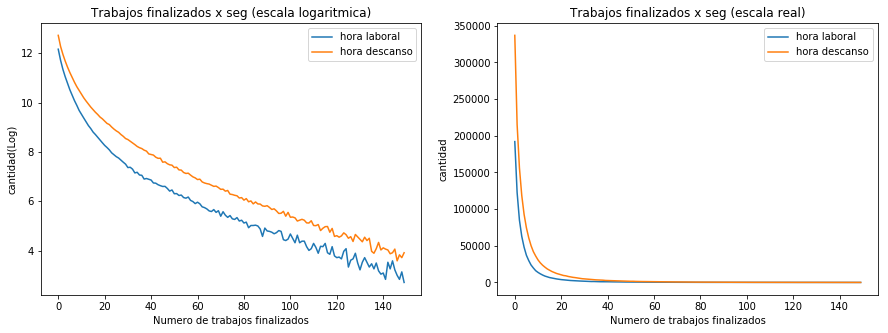

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5

job_fin_hor = pd.crosstab(datos.N_jobs_fin, datos.hora_laboral)

x = job_fin_hor.index[0:150]
y1 = np.log(job_fin_hor[0][0:150])
y2 = np.log(job_fin_hor[1][0:150])

adlab = "(Log)"
xlabel = "Numero de trabajos finalizados"
ylabel = "cantidad"

fig, axs = plt.subplots(1, 2)

axs[0].plot(x, y1,  x, y2)
axs[0].set(title ='Trabajos finalizados x seg (escala logaritmica)',
           xlabel=xlabel,
           ylabel=ylabel+adlab)
axs[0].legend(('hora laboral', 'hora descanso'), loc='upper right')

y1 = job_fin_hor[0][0:150]
y2 = job_fin_hor[1][0:150]

axs[1].plot(x, y1,  x, y2)
axs[1].set(title ='Trabajos finalizados x seg (escala real)',
           xlabel=xlabel,
           ylabel=ylabel)
axs[1].legend(('hora laboral', 'hora descanso'), loc='upper right')

plt.show()


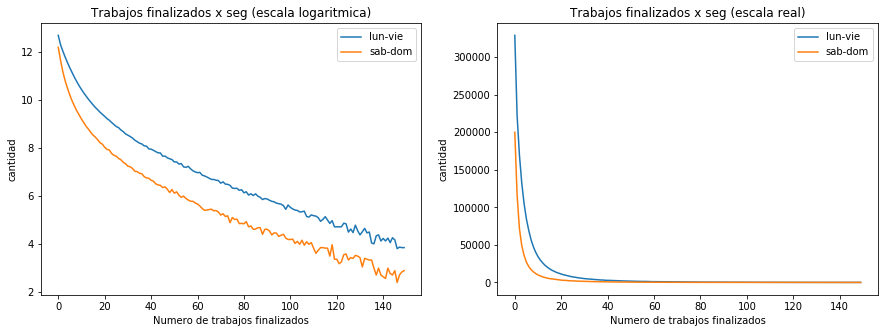

In [5]:
job_fin_dia = pd.crosstab(datos.N_jobs_fin, datos.dia_habil)

x = job_fin_dia.index[0:150]
y1 = np.log(job_fin_dia[0][0:150])
y2 = np.log(job_fin_dia[1][0:150])


fig, axs = plt.subplots(1, 2)

axs[0].plot(x, y1,  x, y2)
axs[0].set(title ='Trabajos finalizados x seg (escala logaritmica)',
           xlabel=xlabel,
           ylabel=ylabel)
axs[0].legend(('lun-vie', 'sab-dom'), loc='upper right')

y1 = job_fin_dia[0][0:150]
y2 = job_fin_dia[1][0:150]

axs[1].plot(x, y1,  x, y2)
axs[1].set(title ='Trabajos finalizados x seg (escala real)',
           xlabel=xlabel,
           ylabel=ylabel)
axs[1].legend(('lun-vie', 'sab-dom'), loc='upper right')
plt.show()

# En las anteriores graficas
Se puede observar que existe evidencia de un comportamiento diferente de la caracteristica: N_job_fin (numero de trabajos finalizados por segundo), con respecto al hora y dia.

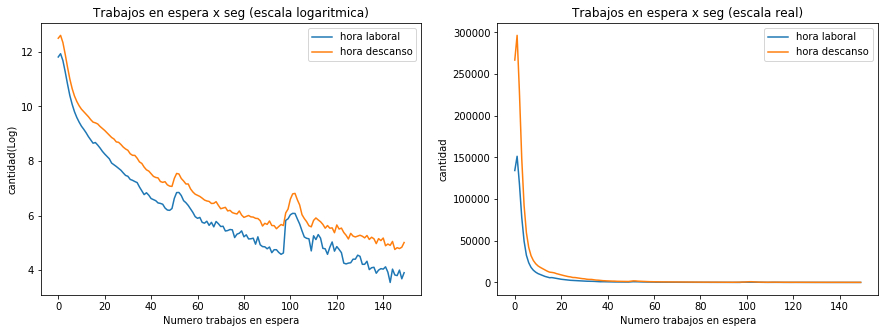

In [6]:
job_esp_hor = pd.crosstab(datos.N_jobs_esp, datos.hora_laboral)

x = job_esp_hor.index[0:150]
y1 = np.log(job_esp_hor[0][0:150])
y2 = np.log(job_esp_hor[1][0:150])

adlab = "(Log)"
xlabel = "Numero trabajos en espera"
ylabel = "cantidad"

fig, axs = plt.subplots(1, 2)

axs[0].plot(x, y1,  x, y2)
axs[0].set(title ='Trabajos en espera x seg (escala logaritmica)',
           xlabel=xlabel,
           ylabel=ylabel+adlab)
axs[0].legend(('hora laboral', 'hora descanso'), loc='upper right')

y1 = job_esp_hor[0][0:150]
y2 = job_esp_hor[1][0:150]

axs[1].plot(x, y1,  x, y2)
axs[1].set(title ='Trabajos en espera x seg (escala real)',
           xlabel=xlabel,
           ylabel=ylabel)
axs[1].legend(('hora laboral', 'hora descanso'), loc='upper right')

plt.show()

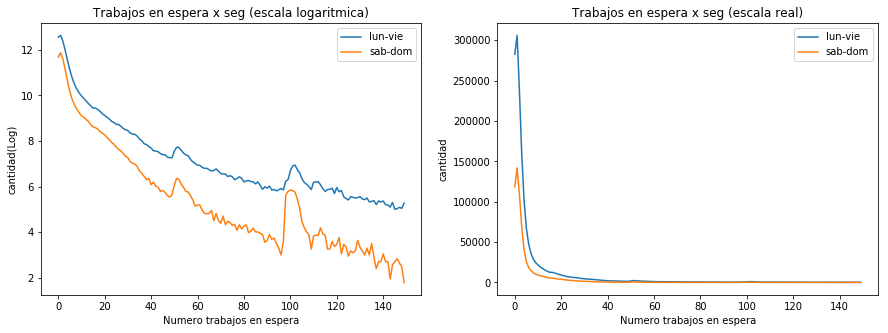

In [7]:
job_esp_dia = pd.crosstab(datos.N_jobs_esp, datos.dia_habil)

x = job_esp_dia.index[0:150]
y1 = np.log(job_esp_dia[0][0:150])
y2 = np.log(job_esp_dia[1][0:150])

adlab = "(Log)"
xlabel = "Numero trabajos en espera"
ylabel = "cantidad"

fig, axs = plt.subplots(1, 2)

axs[0].plot(x, y1,  x, y2)
axs[0].set(title ='Trabajos en espera x seg (escala logaritmica)',
           xlabel=xlabel,
           ylabel=ylabel+adlab)
axs[0].legend(('lun-vie', 'sab-dom'), loc='upper right')

y1 = job_esp_dia[0][0:150]
y2 = job_esp_dia[1][0:150]

axs[1].plot(x, y1,  x, y2)
axs[1].set(title ='Trabajos en espera x seg (escala real)',
           xlabel=xlabel,
           ylabel=ylabel)
axs[1].legend(('lun-vie', 'sab-dom'), loc='upper right')

plt.show()

# Comportamiento general de Jobs en espera y finalizados

<function matplotlib.pyplot.show(*args, **kw)>

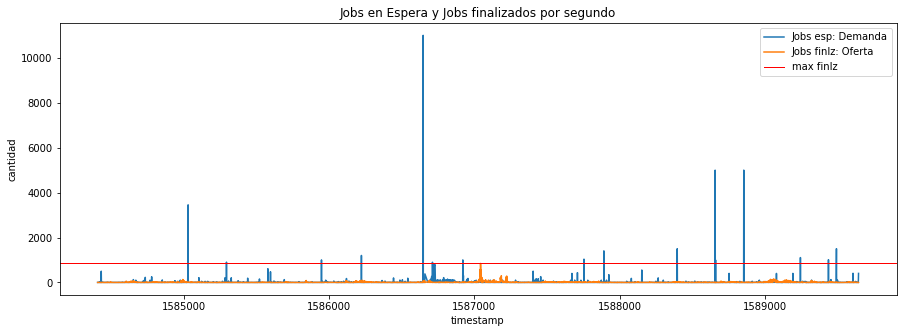

In [97]:
# inf puede ser desde 0, sup siempre mayor q inf (ej. inf= 100 y sup= 1000) ...
inf = 1455590-2500
sup = 1455590+2500

x = datos.index[inf:sup]
y1 = datos.N_jobs_esp[inf:sup]
y2 = datos.N_jobs_fin[inf:sup]

maximo = datos.N_jobs_fin.max()

plt.plot(x, y1, x, y2)
plt.axhline(y=maximo, xmin=0, xmax=sup, color ='r', linewidth=1)

plt.legend(('Jobs esp: Demanda', 'Jobs finlz: Oferta', 'max finlz'), loc='upper right')
plt.title('Jobs en Espera y Jobs finalizados por segundo')
plt.ylabel('cantidad')
plt.xlabel('timestamp')
#plt.ylim(0,1500)

plt.show

# el grafico anterior muestra caracteristica de interes: jobs en espera

La linea roja representa el maximo de jobs finalizados por segundo en todo el dataset, lo que nos permite fijar este valor como banda para crear una nueva variable basada en la caracteristica jobs en espera. Este valor maximo representa la capacidad de respuesta del DC ante peticiones de la red, por tanto cuando este limite es sobrepasado por jobs en espera, hay falta de recursos ante la cantidad de peticiones de servicio, es decir que se alcanza un nivel critico.

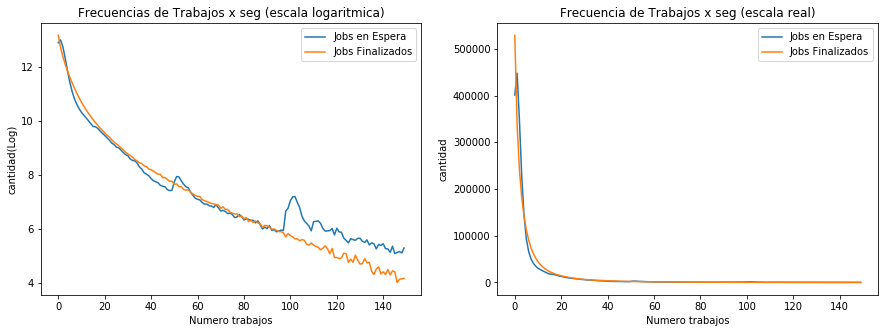

In [26]:
frec_job_esp = datos.groupby(['N_jobs_esp']).size()
frec_job_fin = datos.groupby(['N_jobs_fin']).size()

inf = 0
sup = 150

x = frec_job_esp.index[inf:sup]
y1 = np.log(frec_job_esp[inf:sup])
y2 = np.log(frec_job_fin[inf:sup])

adlab = "(Log)"
xlabel = "Numero trabajos"
ylabel = "cantidad"

fig, axs = plt.subplots(1, 2)

axs[0].plot(x, y1,  x, y2)
axs[0].set(title ='Frecuencias de Trabajos x seg (escala logaritmica)',
           xlabel=xlabel,
           ylabel=ylabel+adlab)
axs[0].legend(('Jobs en Espera', 'Jobs Finalizados'), loc='upper right')

y1 = frec_job_esp[inf:sup]
y2 = frec_job_fin[inf:sup]

axs[1].plot(x, y1,  x, y2)
axs[1].set(title ='Frecuencia de Trabajos x seg (escala real)',
           xlabel=xlabel,
           ylabel=ylabel)
axs[1].legend(('Jobs en Espera', 'Jobs Finalizados'), loc='upper right')

plt.show()

# se puede observar que la distribucion de frecuencias de ambas caracteristicas sigue un mismo patron (parece ajustarse a una distribucion exponencial)

In [94]:
# como localizar el maximo de 'N_jobs_fin en el indice
np.where(datos.index == datos['N_jobs_fin'].idxmax())[0][0]

# ahora se crean 2 nuevas variables
Segun:

1- 'N_jobs_fin' maximo para 'N_jobs_esp, y (cola de espera en limite)

2- 'N_jobs_esp' anterior (2) retardos (memoria de estado)




In [4]:
datos['NJobEspin'] = 0 # valor de jobs en espera por debajo de max de jobfin

datos.loc[datos['N_jobs_esp']>(datos['N_jobs_fin'].max()), 'NJobEspin'] = 1 # por arriba de max

datos['MemEstd'] = datos['N_jobs_esp'].shift(2) # memoria de estado anterior 2 retardos

datos = datos.dropna()

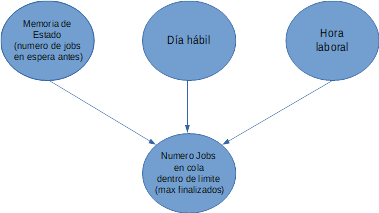
Modelo de red Bayesiana con tres nodos padres independientes

In [26]:
pd.crosstab(datos.NJobEspin, [datos.dia_habil, datos.hora_laboral]) 

dia_habil          0                1        
hora_laboral       0        1       0       1
NJobEspin                                    
0             557271  1084874  219579  454558
1               2183     7566     326    1325

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X = pd.DataFrame()
X['dia_habil'] = datos['dia_habil']
X['hora_laboral'] = datos['hora_laboral']
X['MemEstd'] = datos['MemEstd']

Y = datos['NJobEspin']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)  

model = ComplementNB()

model.fit(X_train, y_train)

predicted = model.predict(X_test)

print('precision = {:2.2%}'.format(accuracy_score(y_test, predicted)), '\n')

print(confusion_matrix(y_test, predicted))



precision = 76.51% 

[[533078 161767]
 [  2242   1218]]


In [ ]:
from sklearn.svm import SVC
msv = SVC(kernel='linear', class_weight = "balanced", random_state = 20)
msv.fit(X_train, y_train)
predicted = msvSAHeart.predict(X_test)

print('precision = {:2.2%}'.format(accuracy_score(y_test, predicted)), '\n')

print(confusion_matrix(y_test, predicted))
